# Python introduction

_Edited from https://github.com/daliagachc/negi-stuff/_


## Why Python?

<img align="left" style="padding-right:10px;" src="imgs/stack_plot.svg" width="800">

<small>(Source: [Stack Overflow](https://goo.gl/YwPocq))</small>

# Jupyter

<img align="left" style="padding-right:10px;" src="imgs/jupyter_logo.png" width="200">

<img align="left" style="padding-right:10px;" src="imgs/jup_img.png" width="500">

## Why do we use jupyter lab?
- Easy to use, easy to share!
    - You can share code, plots and text together --> makes easy to follow description of your work 
- Work interactively with your data
    - Plot, make change, replot and have all of it together together in one document
    - Also remotely
- Reproducability
- Almost an IDE


![](imgs/Fieldnotes_jlab.png)
[Jupyter org](http://jupyter.org/)

# Jupyter Notebooks 
## Web Resources

- [The IPython website](http://ipython.org): The IPython website links to documentation, examples, tutorials, and a variety of other resources.
- [The nbviewer website](http://nbviewer.jupyter.org/): This site shows static renderings of any IPython notebook available on the internet. The front page features some example notebooks that you can browse to see what other folks are using IPython for!
- [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks/): This ever-growing list of notebooks, powered by nbviewer, shows the depth and breadth of numerical analysis you can do with IPython. It includes everything from short examples and tutorials to full-blown courses and books composed in the notebook format!
- Video Tutorials: searching the Internet, you will find many video-recorded tutorials on IPython. I'd especially recommend seeking tutorials from the PyCon, SciPy, and PyData conferenes by Fernando Perez and Brian Granger, two of the primary creators and maintainers of IPython and Jupyter.

## Basic jupyter lab:

In [8]:
a = 2
print(a)

2


# Hei Hei

### Mark down cell
Latex formatting:
$x^2 = y^2 + z^2$

**Longer:**
\begin{align}
x+1 =& 2 \\
x =& 2-1
\end{align}

_Italic_

### Code cell:

In [9]:
x=1
y=2
x+y

3

### Contextual help:
click CTRL + i

In [10]:
import numpy as np
a = np.array([1,2,3])
np.max(a)

3

## Basic python

### Plotting

Let's make some random data

- Plot two lineplot
- Add xlabel, ylabel, title, legend
- make a scatter plot
- customize linewidth/size, alpha, etc
- set xlim, ylim

In [11]:
import matplotlib.pyplot as plt
x= [1,2,3,4]
y= np.array([2,3,2,6])
y2 = y+1
# ADD xlabel, ylabel and title

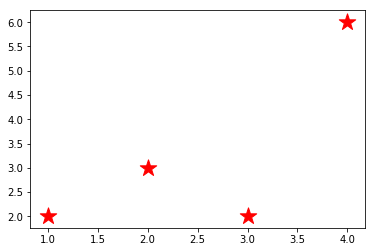

In [12]:
plt.scatter(x,y, c='r', marker='*', s=300)

## Super small pandas example:

In [26]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tser = pd.read_csv('sample_data/daily-min-temperatures.csv',index_col=0,parse_dates=True)

In [27]:
tser = tser['Temp']
tser_mm = tser.resample('M').mean()
tser_sd = tser.resample('M').std()
tser_clim_mm = tser.groupby(by=tser.index.month).mean()
tser_clim_sd = tser.groupby(by=tser.index.month).std()

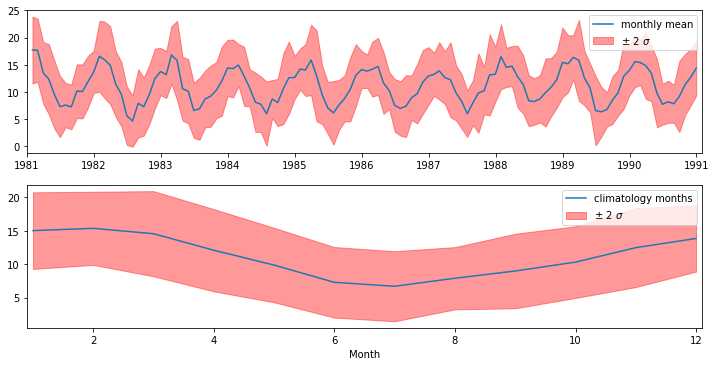

In [28]:
fig, axs = plt.subplots(2,1, figsize=[10,5])
axs[0].fill_between(tser_mm.index, (tser_mm-2*tser_sd), tser_mm+2*tser_sd, 
                    alpha=.4, color='r', label=r'$\pm$ 2 $\sigma$')
axs[0].plot(tser_mm.index, tser_mm, label='monthly mean')
axs[0].legend()
axs[1].fill_between(tser_clim_mm.index, (tser_clim_mm-2*tser_clim_sd), 
                    tser_clim_mm+2*tser_clim_sd, 
                    alpha=.4, color='r', label=r'$\pm$ 2 $\sigma$')
axs[1].plot(tser_clim_mm.index, tser_clim_mm, label='climatology months')
axs[1].legend()
plt.tight_layout()
axs[1].set_xlabel('Month')
axs[1].set_xlim([.9,12.1])
axs[0].set_xlim('1981-1', '1991-02')
plt.show()

## Make a function when you do things multiple times!
E.g. the plot above!

# SHOW EXPORTS AS PDF

# Classes in python:

### A very small python class introduction

We will be using a python class to write the model. A class can be described as the programming version of "a type of thing". Much like a human could be an instance of the class human beings, the individual instances of a python class might have different attributes (e.g. human names) and give you different responses when asked to perform certain tasks (e.g. conversation). 

_Example:_ If you have ever used the package numpy, you might (or might not) know, that the numpy n dimension array "ndarray" is a class. It has some attributes like "shape", "dtype" (the data type) and it has some methods, like "sum" or "max"/"min". 

In [34]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])  # creates an object of the numpy ndarray class
b = np.array([[1, 4, 4], [4, 5, 6]])  # creates an object of the numpy ndarray class

In [35]:
type(b)

numpy.ndarray

In [33]:
print(type(a))

<class 'numpy.ndarray'>


In [36]:
a.sum()  # .sum is a method of the ndarray class

21

In [37]:
a.shape  # .shape is an attribute of the ndarray class

(2, 3)

In [19]:
class Human:
    def __init__(self, name, email):
        self.name = name  # set attributes
        self.email = email
        return

    def say_hi_to(self, name_other):  # this is a class method
        print('Hi %s, my name is %s!\n My email is %s' % (name_other, 
                                                          self.name, self.email))

In [38]:
sara = Human("Sara", "s.m.blichner@geo.uio.no")

In [40]:
sara.name  # Get attribute
sara.email

's.m.blichner@geo.uio.no'

In [41]:
sara.say_hi_to('students')  # call method

Hi students, my name is Sara!
 My email is s.m.blichner@geo.uio.no


#### Make a subclass

A subclass inherets everything from the parent class (here Human) -- unless the specific attribute or method is overwritten in the subclass. 

In [42]:
class Student(Human):
    def __init__(self, name, email, student_id,
                 institution = 'UiO'):
        # notice the default argument here --
        # if nothing else is specified the institution will be UiO
        self.student_id = student_id
        self.institution = institution
        super().__init__(name, email)

    def present_myself(self):
        print('Hi all, my name is %s and I am a student here at %s! \
            \n My email is %s and my student id is %s'
              % (self.name, self.institution, self.email, self.student_id))

In [43]:
student = Student('Ola', 'ola@uio.no', 9999)
print(student.name)

Ola


In [44]:
student.say_hi_to('Sara')

Hi Sara, my name is Ola!
 My email is ola@uio.no


In [45]:
student.present_myself()

Hi all, my name is Ola and I am a student here at UiO!             
 My email is ola@uio.no and my student id is 9999
